In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress


In [443]:
# Import gold and wheat csv
gold_year = pd.DataFrame(pd.read_csv(r"C:\Users\uwagb\OneDrive\Desktop\project\resources\year_gold.csv"))
wheat_year = pd.DataFrame(pd.read_csv(r"C:\Users\uwagb\OneDrive\Desktop\project\resources\year_wheat.csv"))
oscar_ombd = pd.DataFrame(pd.read_csv(r"C:\Users\uwagb\OneDrive\Desktop\project\resources\oscar_omdb_clean.csv"))

In [444]:

gold_year = gold_year.rename(columns={"Average Closing Price": "Gold Avg Closing Price",
                                        "Year Open" : "Gold Year Open",
                                        "Year High": "Gold Year High",
                                        "Year Low": "Gold Year Low",
                                        "Year Close": "Gold Year Close" ,
                                        "Annual % Change" : "Gold Annual % Change"
                                        })
del gold_year["Year Range Price"]
gold_df = gold_year.astype({"Gold Avg Closing Price": float,
                                "Gold Year Open": float,
                                "Gold Year High": float,
                                "Gold Year Low": float,
                                "Gold Year Close": float,
                                'Gold Annual % Change': float})
 
gold_year.head()


,Year,Gold Avg Closing Price,Gold Year Open,Gold Year High,Gold Year Low,Gold Year Close,Gold Annual % Change
0,1969,41.10,41.80,43.75,35.00,35.21,-0.161
1,1970,35.96,35.13,39.19,34.78,37.38,0.062
2,1971,40.80,37.33,43.90,37.33,43.50,0.164
3,1972,58.17,43.73,70.00,43.73,64.70,0.487
4,1973,97.12,64.99,127.00,64.10,112.25,0.735


In [445]:
wheat_year= wheat_year.sort_values(["year"], ascending= True)

wheat_year = wheat_year.rename(columns={"avg_closing_price": "Wheat Avg Closing Price",
                                        "year_open" : "Wheat Year Open",
                                        "year_high": "Wheat Year High",
                                        "year_low": "Wheat Year Low",
                                        "year_close": "Wheat Year Close" ,
                                        "annual_perc_change" : "Wheat Annual % Change",
                                        "year": "Year"})
wheat_year = wheat_year[wheat_year["Year"] >= 1969]
wheat_year = wheat_year.reset_index(drop=True)
wheat_year["Wheat Annual % Change"] = wheat_year["Wheat Annual % Change"].replace({r'\W':''}, regex = True)
wheat_year["Wheat Avg Closing Price"] = wheat_year["Wheat Avg Closing Price"].replace({r'\$':''}, regex = True)
wheat_year["Wheat Year Close"] = wheat_year["Wheat Year Close"].replace({r'\$':''}, regex = True)
wheat_year["Wheat Year High"] = wheat_year["Wheat Year High"].replace({r'\$':''}, regex = True)
wheat_year["Wheat Year Low"] = wheat_year["Wheat Year Low"].replace({r'\$':''}, regex = True)
wheat_year["Wheat Year Open"] = wheat_year["Wheat Year Open"].replace({r'\$':''}, regex = True)





In [446]:
wheat_df = wheat_year.astype({"Wheat Avg Closing Price": float,
                                "Wheat Year Open": float,
                                "Wheat Year High": float,
                                "Wheat Year Low": float,
                                "Wheat Year Close": float,
                                'Wheat Annual % Change': float})
wheat_df["Wheat Annual % Change"]= wheat_df["Wheat Annual % Change"].div(100)
wheat_df.head()



,Year,Wheat Avg Closing Price,Wheat Year Open,Wheat Year High,Wheat Year Low,Wheat Year Close,Wheat Annual % Change
0,1969,1.3286,1.3525,1.480,1.2125,1.4738,8.77
1,1970,1.5341,1.4538,1.790,1.3450,1.6850,14.33
2,1971,1.5757,1.6788,1.725,1.4150,1.6313,3.19
3,1972,1.8039,1.6188,2.695,1.4013,2.6400,61.83
4,1973,3.4883,2.5925,5.450,2.1475,5.4500,106.44


In [451]:
#merge both wheat and gold

box_df = pd.merge(gold_year, wheat_df, on = "Year", how= "inner" )
box_df= box_df[["Year", "Gold Avg Closing Price", "Wheat Avg Closing Price"]]
box_df

,Year,Gold Avg Closing Price,Wheat Avg Closing Price
0,1969,41.10,1.3286
1,1970,35.96,1.5341
2,1971,40.80,1.5757
3,1972,58.17,1.8039
4,1973,97.12,3.4883
5,1974,158.76,4.7135
6,1975,160.87,3.6960
7,1976,124.80,3.3263
8,1977,147.84,2.5765
9,1978,193.57,3.1801


In [448]:
oscar_ombd = oscar_ombd[["Year", "Oscar_Film", "BoxOffice"]]
oscar_ombd = oscar_ombd.dropna(how="any")
oscar_ombd = oscar_ombd.astype({"Year" : "Int64"})
oscar_ombd = oscar_ombd[oscar_ombd["Year"] >= 1969]
oscar_ombd

,Year,Oscar_Film,BoxOffice
0,2022,Everything Everywhere All at Once,77191785.0
2,2022,The Whale,17463630.0
3,2022,Top Gun: Maverick,718732821.0
4,2022,Black Panther: Wakanda Forever,453829060.0
5,2022,Avatar: The Way of Water,684075767.0
...,...,...,...
1233,1982,Tempest,5005245.0
1251,2002,The Time Machine,56832494.0
1276,2003,Underworld,51970690.0
1279,1991,Van Gogh,193205.0


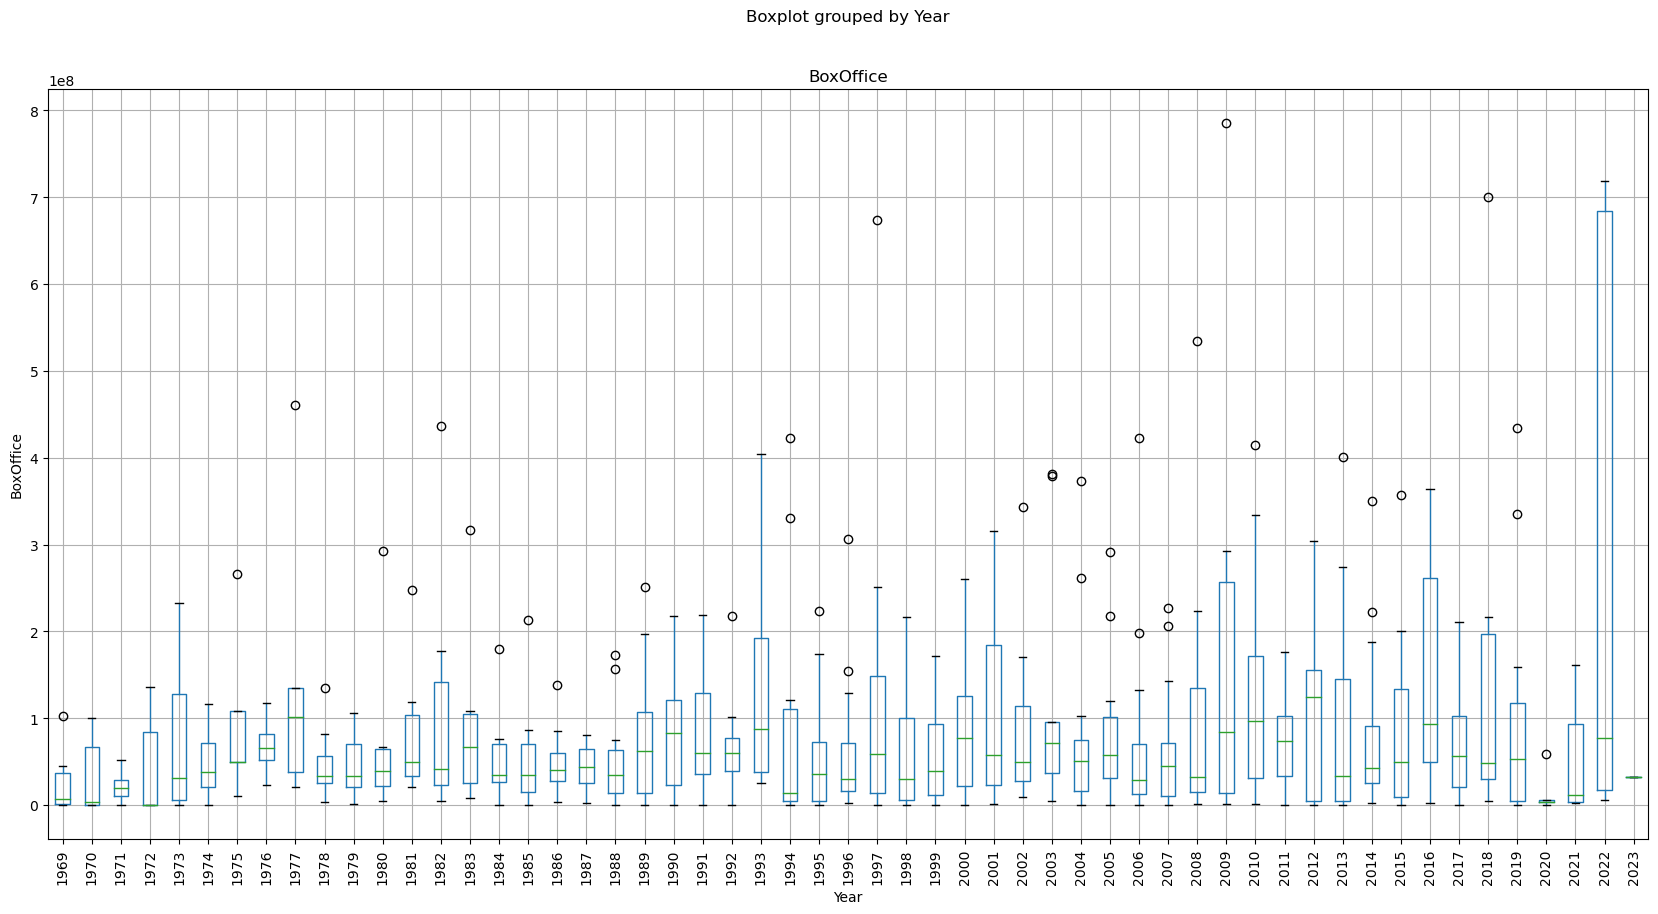

In [449]:
plot = oscar_ombd[['Year','BoxOffice']].boxplot(by='Year', rot=90 , fontsize=10, xlabel = "Year", ylabel ="BoxOffice",
                                                figsize=(20,10))
plot.figure.savefig(r"C:\Users\uwagb\OneDrive\Desktop\project\outputs\BoxOffice_boxplot.png")

In [454]:
box_comodity = pd.merge(box_df, oscar_ombd, on= "Year", how= "inner")
box_comodity.head()

,Year,Gold Avg Closing Price,Wheat Avg Closing Price,Oscar_Film,BoxOffice
0,1969,41.1,1.3286,Midnight Cowboy,44785053.0
1,1969,41.1,1.3286,Butch Cassidy and the Sundance Kid,102308889.0
2,1969,41.1,1.3286,"Hello, Dolly!",400881.0
3,1969,41.1,1.3286,Z,83305.0
4,1969,41.1,1.3286,Anne of the Thousand Days,2068232.0
